## t-SNE map and nearest neighbors for APOGEE spectra
#### Reference: https://academic.oup.com/mnras/article/476/2/2117/4848309

### The data is available at J/MNRAS/476/2117 (http://cdsarc.u-strasbg.fr/viz-bin/Cat?cat=J%2FMNRAS%2F476%2F2117&target=brief&). To use this notebook download the data and extract in the same folder as the notebook. The following files are needed: 

* ** J_MNRAS_476_2117/apogeenn.dat **
* ** J_MNRAS_476_2117/tsnecoor.dat **
* ** J_MNRAS_476_2117/distance.dat **

### In addition the apogee catalog is requierd in 

* ** fits/allStar-l31c.2.fits ** 

### This can be downloaded from https://data.sdss.org/sas/dr14/apogee/spectro/redux/r8/stars/l31c/l31c.2/allStar-l31c.2.fits

In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt
from astropy.io import fits

# 1. t-SNE map

In [2]:
tSNE_df = pandas.read_csv('J_MNRAS_476_2117/tsnecoor.dat', delimiter='\s+', header=None, index_col=0 )
print(tSNE_df.shape)
tSNE_df.head()

(193556, 2)


,1,2
0,,
2M17000409+3544362,-4.005482,-13.519043
2M17001717+3510487,-4.963811,-14.101923
2M17001771+3556434,-6.081223,-19.398386
2M17002150+3542233,1.859843,-37.174065
2M17002727+3544183,-19.466570,-11.839557


In [3]:
from astropy.io import fits

allstar_fits_filename = 'fits/allStar-l31c.2.fits'
with fits.open(allstar_fits_filename) as hdulist:

    allstar = pandas.DataFrame([hdulist[1].data['APOGEE_ID'],
                        hdulist[1].data['RA'],
                        hdulist[1].data['DEC'],
                        hdulist[1].data['TEFF'],
                        hdulist[1].data['LOGG'],
                        hdulist[1].data['O_FE'],
                        hdulist[1].data['C_FE'],
                        hdulist[1].data['M_H']], 
                        index = ['APOGEE_ID', 
                        'RA', 
                        'DEC',
                        'TEFF',
                        'LOGG',
                        'O_FE',
                        'C_FE',
                        'M_H'])

allstar = allstar.T
allstar = allstar.set_index('APOGEE_ID')
print(allstar.shape)
allstar = allstar[~allstar.index.duplicated(keep='first')]
print(allstar.shape)
allstar.head()

(277371, 7)
(258475, 7)


,RA,DEC,TEFF,LOGG,O_FE,C_FE,M_H
APOGEE_ID,,,,,,,
VESTA,0,0,5723.84,-9999,-0.0105972,0.0247771,0.0386801
2M00000002+7417074,0.000103,74.2854,3738.63,0.727419,0.0723792,0.0084211,-0.0681051
2M00000019-1924498,0.000832,-19.4139,5591.62,-9999,0.222009,0.0224563,-0.182092
2M00000032+5737103,0.001335,57.6195,6197.46,-9999,0.199215,0.0602879,-0.270533
2M00000068+5710233,0.00285,57.1732,4987.15,3.35494,-0.0528378,-0.120434,-0.122799


In [4]:
#estar_all = star_all.loc[tSNE_df.index]

In [5]:
allstar_w_tsne = allstar.merge(tSNE_df, left_index=True, right_index=True, how = 'inner')
print(allstar_w_tsne.shape)
allstar_w_tsne.head()

(193556, 9)


,RA,DEC,TEFF,LOGG,O_FE,C_FE,M_H,1,2
2M00000002+7417074,0.000103,74.2854,3738.63,0.727419,0.0723792,0.0084211,-0.0681051,4.973145,42.606949
2M00000019-1924498,0.000832,-19.4139,5591.62,-9999,0.222009,0.0224563,-0.182092,-4.957928,-25.664000
2M00000032+5737103,0.001335,57.6195,6197.46,-9999,0.199215,0.0602879,-0.270533,-20.814169,-12.253771
2M00000032+5737103,0.001335,57.6195,6197.46,-9999,0.199215,0.0602879,-0.270533,-20.426889,-12.844394
2M00000068+5710233,0.00285,57.1732,4987.15,3.35494,-0.0528378,-0.120434,-0.122799,1.782364,-14.551208


In [6]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 25
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.grid'] = False
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.labelsize'] = 'large'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['xtick.labelsize'] = 'large'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['text.usetex'] = True

In [7]:
nof_objects = allstar_w_tsne.shape[0]
tsne_x = allstar_w_tsne[1].values.astype(float)
tsne_y = allstar_w_tsne[2].values.astype(float)

# Axis limits for the plots, note that there are a few objects outside these limts
xmn = -40
xmx = 30
xlim = [xmn, xmx]

ymn = -50
ymx = 55
ylim = [ymn, ymx]


In [8]:
#cws = allstar_w_tsne['TEFF'].values.astype(float)
#subsample = numpy.where(cws > -9000)

#cmin = 3000
#cmax =  8000
#inds = range(nof_objects)

#plt.figure(figsize  = (12,7))
#plt.scatter(tsne_x[subsample],tsne_y[subsample], c=cws[subsample],vmin=cmin, vmax=cmax,cmap='Spectral')
#plt.xlim(xlim)
#plt.ylim(ylim)
#plt.title('Effective Temperature')
#plt.axis('off')
#cb = plt.colorbar()
#cb.set_label('$\mathrm{T}_{\mathrm{eff}} [K]$', color='black', fontsize = 25)

#plt.tight_layout()
#plt.show()

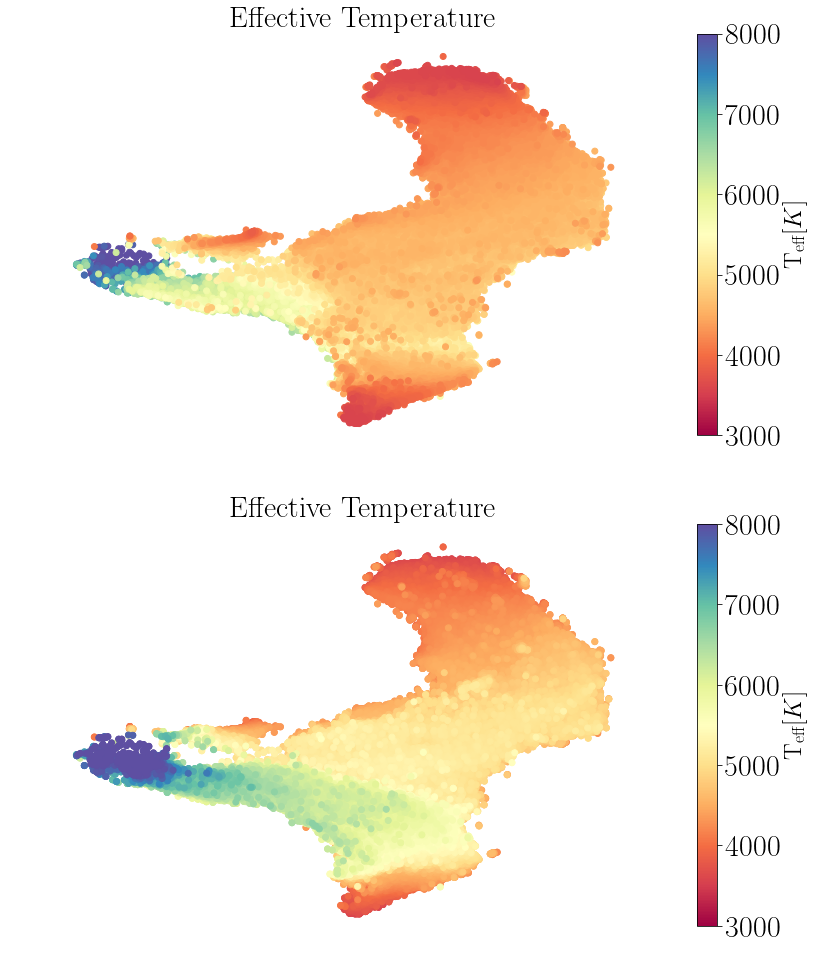

In [9]:
cws = allstar_w_tsne['TEFF'].values.astype(float)
subsample = numpy.where(cws > -9000)[0]

cmin = 3000
cmax =  8000
inds = range(nof_objects)

f, axes  = plt.subplots(nrows=2, ncols =1, figsize  = (12,14))

ax1 = axes[0]
ax2 = axes[1]
subsample_sort = subsample[numpy.argsort(cws[subsample])[::-1]]
ax1_sctr = ax1.scatter(tsne_x[subsample_sort],tsne_y[subsample_sort], c=cws[subsample_sort],vmin=cmin, vmax=cmax,cmap='Spectral')
cb = f.colorbar(ax1_sctr, ax = ax1)
cb.set_label('$\mathrm{T}_{\mathrm{eff}} [K]$', color='black', fontsize = 25)
ax1.set_xlim(xlim)
ax1.set_ylim(ylim)
ax1.set_title('Effective Temperature')
ax1.axis('off')

subsample_sort = subsample[numpy.argsort(cws[subsample])]
ax2.scatter(tsne_x[subsample_sort],tsne_y[subsample_sort], c=cws[subsample_sort],vmin=cmin, vmax=cmax,cmap='Spectral')
ax2_sctr = ax2.scatter(tsne_x[subsample_sort],tsne_y[subsample_sort], c=cws[subsample_sort],vmin=cmin, vmax=cmax,cmap='Spectral')
cb = f.colorbar(ax2_sctr, ax = ax2)
cb.set_label('$\mathrm{T}_{\mathrm{eff}} [K]$', color='black', fontsize = 25)
ax2.set_xlim(xlim)
ax2.set_ylim(ylim)
ax2.set_title('Effective Temperature')
ax2.axis('off')


plt.tight_layout()
plt.show()

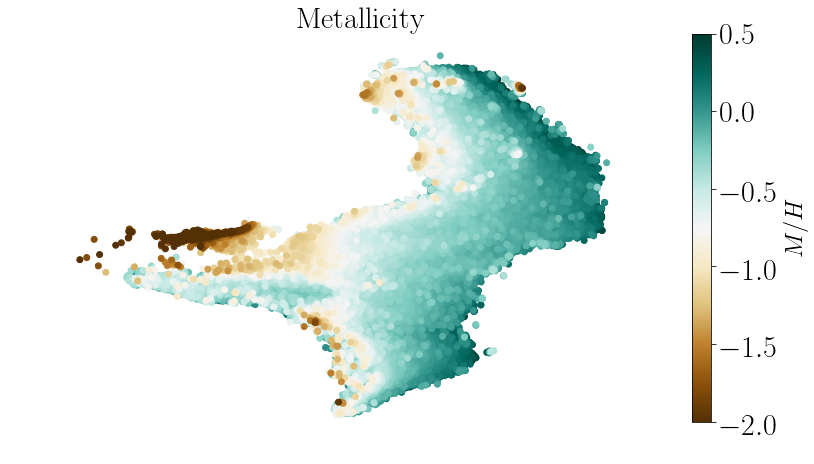

In [10]:
cws = allstar_w_tsne['M_H'].values.astype(float)

subsample = numpy.where(cws > -9000)[0]
subsample = subsample[numpy.argsort(cws[subsample])[::-1]] # Low M/H in front
#subsample = subsample[numpy.argsort(cws[subsample])] # High M/H in front

cmin = -2
cmax =  0.5


plt.figure(figsize  = (12,7))
plt.scatter(tsne_x[subsample], tsne_y[subsample], c=cws[subsample],vmin=cmin, vmax=cmax, cmap='BrBG')
plt.xlim(xlim)
plt.ylim(ylim)
plt.title('Metallicity')
plt.axis('off')
cb = plt.colorbar()
cb.set_label('$M/H$', color='black', fontsize = 25)

plt.tight_layout()
plt.show()

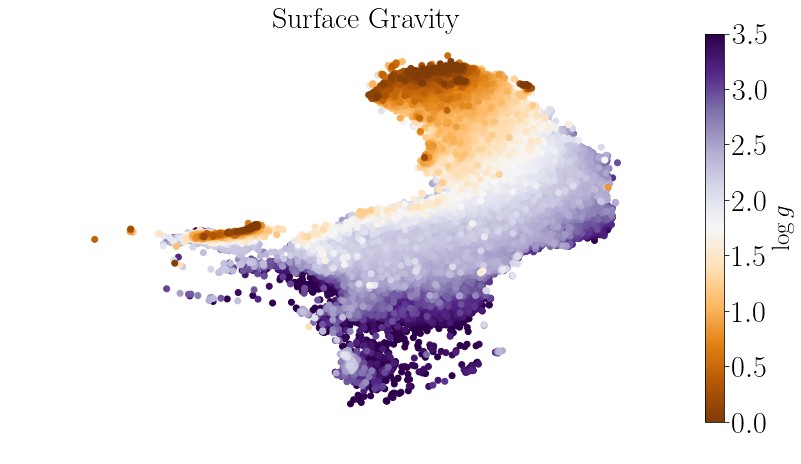

In [11]:
cws = allstar_w_tsne['LOGG'].values.astype(float)
subsample = numpy.where(cws > -9000)[0]

subsample = subsample[numpy.argsort(cws[subsample])[::-1]] #Dwarfs in the front
#subsample = subsample[numpy.argsort(cws[subsample])] #Giants in the front

cmin = 0
cmax =  3.5

plt.figure(figsize  = (12,7))
plt.scatter(tsne_x[subsample], tsne_y[subsample], c=cws[subsample], vmin=cmin, vmax=cmax, cmap='PuOr')
plt.xlim(xlim)
plt.ylim(ylim)
plt.title('Surface Gravity')
plt.axis('off')
cb = plt.colorbar()
cb.set_label('$\log{g}$', color='black', fontsize = 25)

plt.tight_layout()
plt.show()

# 2. Nearest neighbors search
### Given the APOGEE ID, find the stars with most similar spectra

In [22]:
def get_nearest_neighbors(APOGEE_ID, ngbs_df, n_ngbs = 10):
    df_size = ngbs_df.shape[1]
    n_ngbs = min(df_size, n_ngbs)
    
    if not APOGEE_ID in ngbs_df.index:
        print('APOGEE_ID = ', APOGEE_ID, 'is not included in this subsample of APOGEE stars')
    else:
        print('Original object:', APOGEE_ID, 'http://skyserver.sdss.org/dr14/en/tools/explore/summary.aspx?sid=' + APOGEE_ID + '&apid=')

    
    columns = [i for i in range(1, n_ngbs)]
    
    for c in columns:
        N_APOGEE_ID = ngbs_df[c].loc[APOGEE_ID]
        print(N_APOGEE_ID, 'http://skyserver.sdss.org/dr14/en/tools/explore/summary.aspx?sid=' + N_APOGEE_ID + '&apid=')

    return

In [12]:
nearest_neighbors_df = pandas.read_csv('J_MNRAS_476_2117/apogeenn.dat', delimiter=' ', header=None, index_col=0)
print(nearest_neighbors_df.shape)
nearest_neighbors_df.head()

(183232, 99)


,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
0,,,,,,,,,,,,,,,,,,,,,
2M17000409+3544362,2M17101368+3542020,2M10365355+4338479,2M17015458+3632069,2M17395226+3434284,2M10012643+4305489,2M03554471+7900343,2M11545833-1128080,2M12473599+1305168,2M00492861+0201093,2M13272906+3759366,...,2M08500058+1143578,2M23334566+3031169,2M06595645+2531436,2M07422768+4008085,2M08185092+2759136,2M13465677+2849487,2M07380645+1734240,2M09463538+3811507,2M08185092+2759136,2M06501655+4347094
2M17001717+3510487,2M11514231+0019426,2M12005812+1923416,2M11554732+3524354,2M12511345+4217527,2M11494668-0011285,2M17394822-0628445,2M17103385+3641103,2M03442144-0939285,2M10281473+1554332,2M05203047+2317457,...,2M14435238+1308510,2M18255215-0412080,2M16342383+3842561,2M11512479+0019503,2M02421582-1214094,2M15051398+4223217,2M15051398+4223217,2M17330679+3550322,2M11505560+4506225,2M12150348+1431563
2M17001771+3556434,2M02320580-0724118,2M03442144-0939285,2M02313090-1012465,2M17102123+3522059,2M10495306+4548210,2M11512479+0019503,2M16480533-0316347,2M11494668-0011285,2M18051106-0934420,2M16360577+4449368,...,2M19202934+4117283,2M14574591+1813330,2M16390433+4324265,2M13522422+3851177,2M12185691+4015017,2M05151957+2430580,2M18050591-0917375,2M12142336+1441111,2M16300220-0048025,2M12284787+1305165
2M17002150+3542233,2M20263164+5927193,2M03455475+0038381,2M19254047+3907387,2M14532193+1601534,2M11122814+4808205,2M05085906+4819508,2M14080155+4532315,2M00044151-0012321,2M11170614+0835032,2M04062747+4759390,...,2M12502905+1258315,2M11520702+5508095,2M07281420+2235470,2M14544031+3137207,2M07511704+2201569,2M21292359+1256116,2M09494819+4426458,2M09494819+4426458,2M15070995+4154401,2M15070995+4154401
2M17002727+3544183,2M08474967+1209048,2M09172710+2315085,2M09205373+2234050,2M16140911+5004326,2M16100751+5055278,2M19431264+4559170,2M08465521+1159488,2M16144298+2352394,2M10375721+2447287,2M09494567+3721221,...,2M10270634+1409486,2M17531190+6107212,2M15033886+4124257,2M15033886+4124257,2M13483603+2742238,2M10553146+0005394,2M17002727+3544183,2M09193551+2247080,2M14341260+5012166,2M10232168+1446543


In [23]:
get_nearest_neighbors('2M17001771+3556434', nearest_neighbors_df, n_ngbs = 10)

Original object: 2M17001771+3556434 http://skyserver.sdss.org/dr14/en/tools/explore/summary.aspx?sid=2M17001771+3556434&apid=
2M02320580-0724118 http://skyserver.sdss.org/dr14/en/tools/explore/summary.aspx?sid=2M02320580-0724118&apid=
2M03442144-0939285 http://skyserver.sdss.org/dr14/en/tools/explore/summary.aspx?sid=2M03442144-0939285&apid=
2M02313090-1012465 http://skyserver.sdss.org/dr14/en/tools/explore/summary.aspx?sid=2M02313090-1012465&apid=
2M17102123+3522059 http://skyserver.sdss.org/dr14/en/tools/explore/summary.aspx?sid=2M17102123+3522059&apid=
2M10495306+4548210 http://skyserver.sdss.org/dr14/en/tools/explore/summary.aspx?sid=2M10495306+4548210&apid=
2M11512479+0019503 http://skyserver.sdss.org/dr14/en/tools/explore/summary.aspx?sid=2M11512479+0019503&apid=
2M16480533-0316347 http://skyserver.sdss.org/dr14/en/tools/explore/summary.aspx?sid=2M16480533-0316347&apid=
2M11494668-0011285 http://skyserver.sdss.org/dr14/en/tools/explore/summary.aspx?sid=2M11494668-0011285&apid=
2M

# 3. Weirdness score

In [26]:
# These are hte distances to the nearest neighbors in 'J_MNRAS_476_2117/apogeenn.dat'
distances_df = pandas.read_csv('J_MNRAS_476_2117/distance.dat', delimiter='\s+', header=None, index_col=0)
print(distances_df.shape)
distances_df.head()

(183232, 99)


,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
0,,,,,,,,,,,,,,,,,,,,,
2M17000409+3544362,0.289795,0.293213,0.293945,0.295166,0.299072,0.299561,0.299805,0.299805,0.300537,0.300537,...,0.313232,0.313232,0.313477,0.313477,0.313477,0.313721,0.313721,0.313721,0.313965,0.313965
2M17001717+3510487,0.261475,0.306396,0.310059,0.310547,0.311279,0.311279,0.312744,0.312988,0.312988,0.313232,...,0.327393,0.327637,0.327637,0.327881,0.328125,0.328125,0.328125,0.328125,0.328369,0.328369
2M17001771+3556434,0.389404,0.392090,0.396240,0.398682,0.399170,0.399902,0.400391,0.401367,0.403809,0.404297,...,0.421875,0.421875,0.422363,0.422363,0.422363,0.422607,0.422852,0.422852,0.423096,0.423584
2M17002150+3542233,0.214722,0.228394,0.231445,0.231445,0.232788,0.233887,0.233887,0.235107,0.235107,0.235352,...,0.248413,0.248535,0.248657,0.248657,0.248779,0.248779,0.249023,0.249390,0.249512,0.249512
2M17002727+3544183,0.229736,0.231201,0.243042,0.248291,0.249634,0.250000,0.250488,0.251465,0.252197,0.252441,...,0.277588,0.277832,0.277832,0.277832,0.277832,0.277832,0.277832,0.277832,0.278320,0.278320


In [41]:
w_100 = distances_df.loc[allstar_w_tsne.index].sum(axis=1)/100

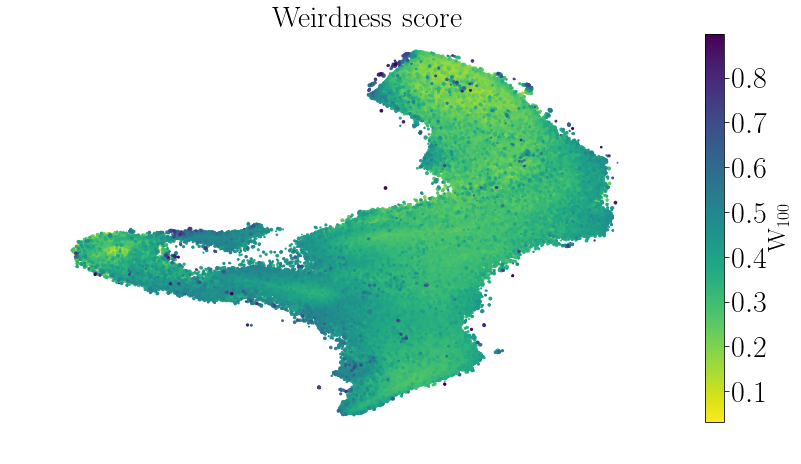

In [48]:
cws = w_100.values.astype(float)
subsample = numpy.arange(nof_objects)
subsample_sort = subsample[numpy.argsort(cws[subsample])] # Weird objects in the front

cmin = cws.min()
cmax = cws.max()*0.95
s = (cws - cmin)/(cmax - cmin) * 20 + (cmax - cws)/(cmax - cmin) * 0.1 # weird objects larger

plt.figure(figsize  = (12,7))
plt.scatter(tsne_x[subsample_sort], tsne_y[subsample_sort], c=cws[subsample_sort], s=s,
            vmin=cmin, vmax=cmax, cmap='viridis_r')
plt.xlim(xlim)
plt.ylim(ylim)
plt.title('Weirdness score')
plt.axis('off')
cb = plt.colorbar()
cb.set_label('$\mathrm{W}_{\mathrm{100}}$', color='black', fontsize = 25)

plt.tight_layout()
plt.show()

# 4. Select objects from t-SNE map
### In this example we select the objects in the small cluster of carbon stars (Figure 2 in https://ui.adsabs.harvard.edu/#abs/2018MNRAS.476.2117R/abstract)

In [49]:
%matplotlib notebook

In [79]:
from matplotlib.widgets import RectangleSelector

def get_inds_click(tmap, xmn, xmx, ymn, ymx):
    objnum = tmap.shape[0]
    inds = (tmap[:,0] > xmn) & (tmap[:,0] < xmx) & (tmap[:,1] > ymn) & (tmap[:,1] < ymx)
    inds = numpy.arange(objnum)[inds]
    #tmp_inds = np.argsort(ws[inds])[::-1]
    #inds = inds[tmp_inds]
    return inds


def line_select_callback(eclick, erelease):
    'eclick and erelease are the press and release events'
    x1, y1 = eclick.xdata, eclick.ydata
    x2, y2 = erelease.xdata, erelease.ydata
    print("(%3.2f, %3.2f) --> (%3.2f, %3.2f)" % (x1, y1, x2, y2))
    print(" The button you used were: %s %s" % (eclick.button, erelease.button))
    global selected_idxs
    selected_idxs = get_inds_click(click_map, min(x1,x2), max(x1,x2), min(y1,y2), max(y1,y2))
      
    art = plt.scatter(click_map[selected_idxs,0], click_map[selected_idxs,1], s = 100, edgecolors='red', c='none')


def toggle_selector(event):
    print(' Key pressed.')
    if event.key in ['Q', 'q'] and toggle_selector.RS.active:
        print(' RectangleSelector deactivated.')
        toggle_selector.RS.set_active(False)
    if event.key in ['A', 'a'] and not toggle_selector.RS.active:
        print(' RectangleSelector activated.')
        toggle_selector.RS.set_active(True)

<IPython.core.display.Javascript object>


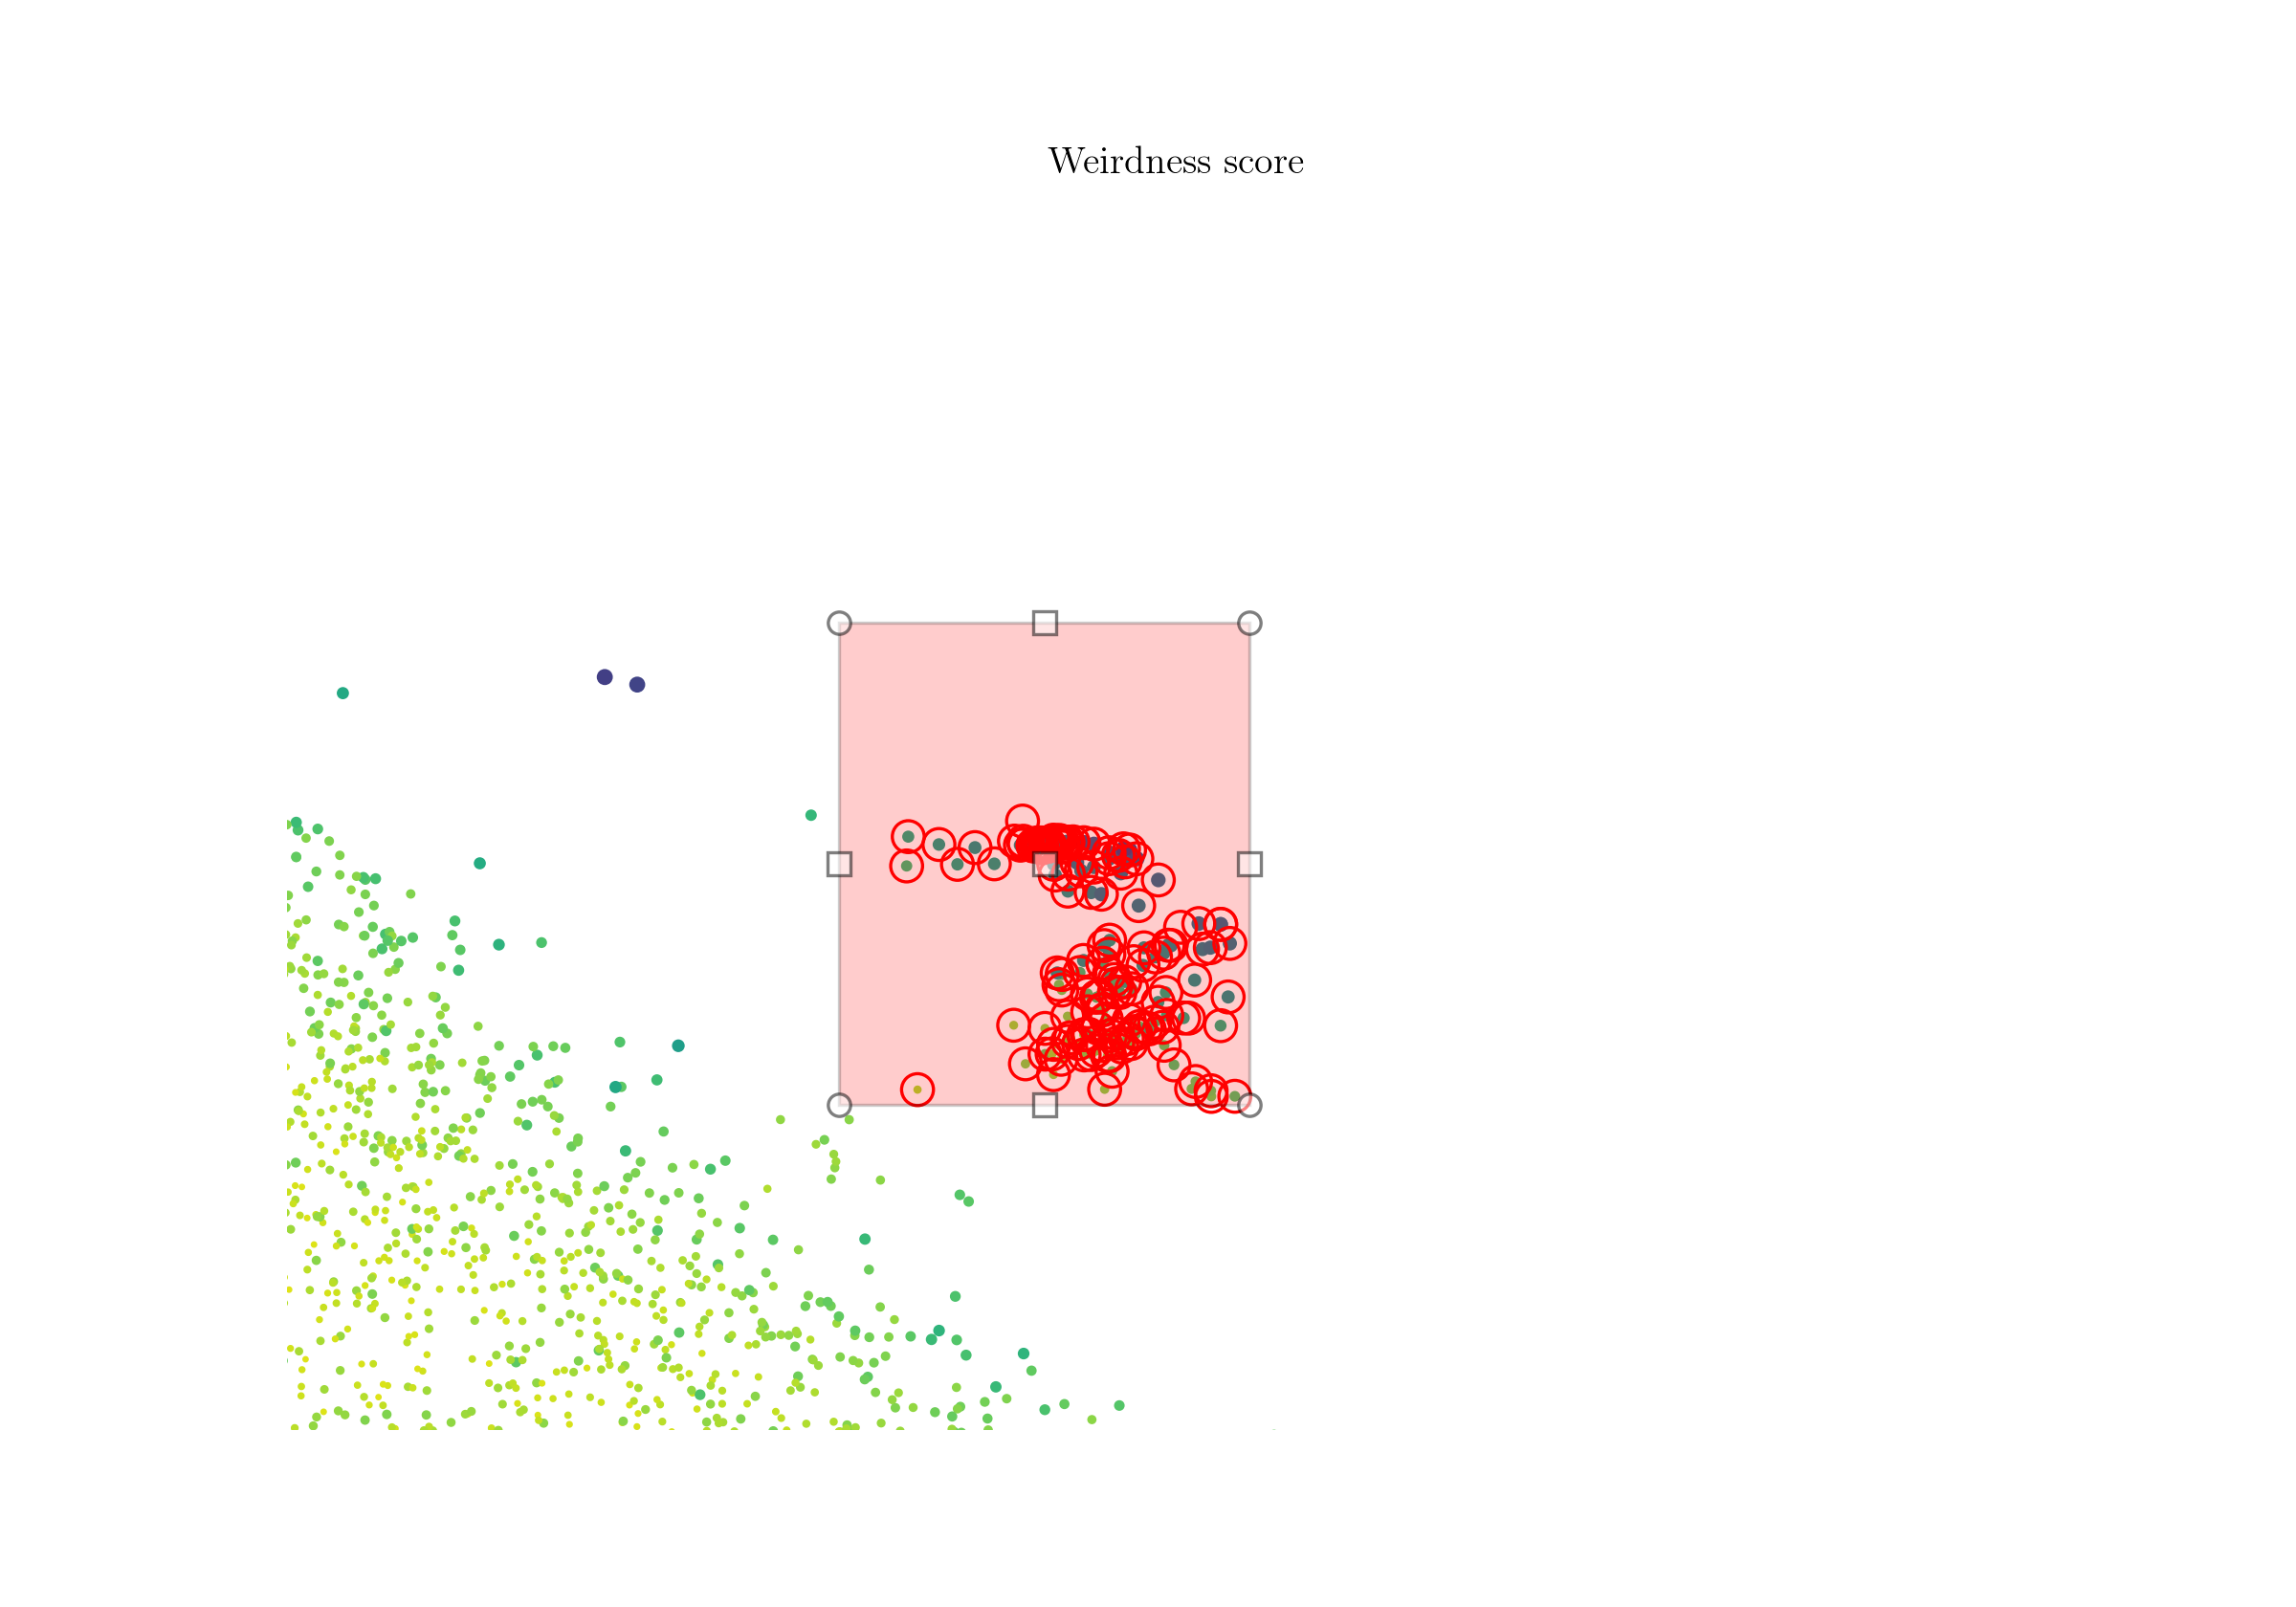

In [80]:
cws = w_100.values.astype(float)
idxs = numpy.arange(nof_objects)

cmin = cws.min()
cmax = cws.max()*0.95
s = (cws - cmin)/(cmax - cmin) * 20 + (cmax - cws)/(cmax - cmin) * 0.1 # weird objects larger

plt.figure(figsize  = (10,7))
click_map = numpy.concatenate([tsne_x.reshape(-1,1), tsne_y.reshape(-1,1)], axis = 1)
plt.scatter(tsne_x[idxs], tsne_y[idxs], c=cws[idxs], s=s,
            vmin=cmin, vmax=cmax, cmap='viridis_r')
plt.xlim(xlim)
plt.ylim(ylim)
plt.title('Weirdness score')
plt.axis('off')
#cb = plt.colorbar()
#cb.set_label('$\mathrm{W}_{\mathrm{100}}$', color='black', fontsize = 25)




plt.axis('off')
plt.show()
current_ax = plt.gca()
toggle_selector.RS = RectangleSelector(current_ax, line_select_callback,
                                           drawtype='box', useblit=True,
                                           button=[1, 3],  # don't use middle button
                                           minspanx=5, minspany=5,
                                           spancoords='pixels',
                                           interactive=True)
event = plt.connect('key_press_event', toggle_selector)

In [84]:
APOGEE_IDs = allstar_w_tsne.index
print('Selected Objects:')
for i in selected_idxs:
    APID = APOGEE_IDs[i]
    print(APID, 'http://skyserver.sdss.org/dr14/en/tools/explore/summary.aspx?sid=' + APID + '&apid=')

Selected Objects:
2M00004072+5714404 http://skyserver.sdss.org/dr14/en/tools/explore/summary.aspx?sid=2M00004072+5714404&apid=
2M00121147+8106582 http://skyserver.sdss.org/dr14/en/tools/explore/summary.aspx?sid=2M00121147+8106582&apid=
2M00202874+5823212 http://skyserver.sdss.org/dr14/en/tools/explore/summary.aspx?sid=2M00202874+5823212&apid=
2M00204063+6802326 http://skyserver.sdss.org/dr14/en/tools/explore/summary.aspx?sid=2M00204063+6802326&apid=
2M00241903+5652559 http://skyserver.sdss.org/dr14/en/tools/explore/summary.aspx?sid=2M00241903+5652559&apid=
2M00242588+6221034 http://skyserver.sdss.org/dr14/en/tools/explore/summary.aspx?sid=2M00242588+6221034&apid=
2M00334926+6837330 http://skyserver.sdss.org/dr14/en/tools/explore/summary.aspx?sid=2M00334926+6837330&apid=
2M00373109+5743345 http://skyserver.sdss.org/dr14/en/tools/explore/summary.aspx?sid=2M00373109+5743345&apid=
2M00530060+6542481 http://skyserver.sdss.org/dr14/en/tools/explore/summary.aspx?sid=2M00530060+6542481&apid=
2